In [21]:
from ema_workbench import load_results

In [22]:
results = load_results("./data/all policies 500 experiments.tar.gz")

In [23]:
experiments, outcomes = results
x = pd.DataFrame.from_records(experiments)
y = outcomes

In [24]:
# generate_html(x, y)
x.drop("model", axis=1, inplace=True)
x.head()

,DamFunctTbl_multiplier,ShipTbl1,ShipTbl2,ShipTbl3,climate scenarios,collaboration,fragility dikes,land use scenarios,policy
0,0.041365,-0.018154,0.007849,0.052011,6,1.346968,0.050559,urbanizationDeurbanization,RfR Small Scale
1,-0.037475,-0.045365,-0.076912,0.086806,3,1.338110,-0.083265,NoChange,RfR Small Scale
2,-0.029411,0.062173,0.013414,0.059205,20,1.220111,-0.075652,sustainableGrowth,RfR Small Scale
3,0.088835,0.027455,-0.020385,-0.054509,5,1.427481,0.051081,Deurbanization,RfR Small Scale
4,0.071552,0.079013,0.036246,-0.030826,26,1.318129,0.079514,urbanizationDeurbanization,RfR Small Scale


In [25]:
x["land use scenarios"] = pd.Categorical(x["land use scenarios"])
x.policy = pd.Categorical(x.policy)

In [26]:
x.head()

,DamFunctTbl_multiplier,ShipTbl1,ShipTbl2,ShipTbl3,climate scenarios,collaboration,fragility dikes,land use scenarios,policy
0,0.041365,-0.018154,0.007849,0.052011,6,1.346968,0.050559,urbanizationDeurbanization,RfR Small Scale
1,-0.037475,-0.045365,-0.076912,0.086806,3,1.338110,-0.083265,NoChange,RfR Small Scale
2,-0.029411,0.062173,0.013414,0.059205,20,1.220111,-0.075652,sustainableGrowth,RfR Small Scale
3,0.088835,0.027455,-0.020385,-0.054509,5,1.427481,0.051081,Deurbanization,RfR Small Scale
4,0.071552,0.079013,0.036246,-0.030826,26,1.318129,0.079514,urbanizationDeurbanization,RfR Small Scale


In [40]:
temp = {}
y = x.copy()
for key, value in outcomes.items():
    if value.ndim == 2:
        value = np.sum(value, axis=1)
    y = y.assign(**{key: value})

In [41]:
y.columns

Index(['DamFunctTbl_multiplier', 'ShipTbl1', 'ShipTbl2', 'ShipTbl3',
       'climate scenarios', 'collaboration', 'fragility dikes',
       'land use scenarios', 'policy', 'Flood damage (Milj. Euro)',
       'Number of casualties', 'Costs'],
      dtype='object')

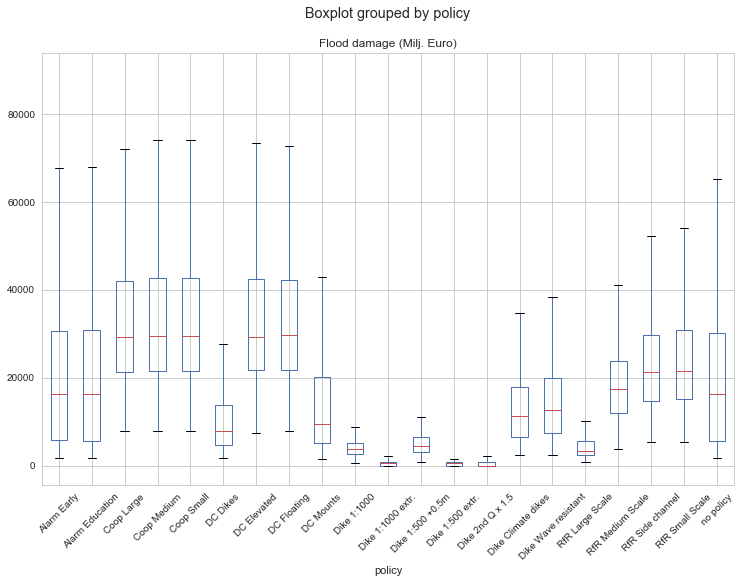

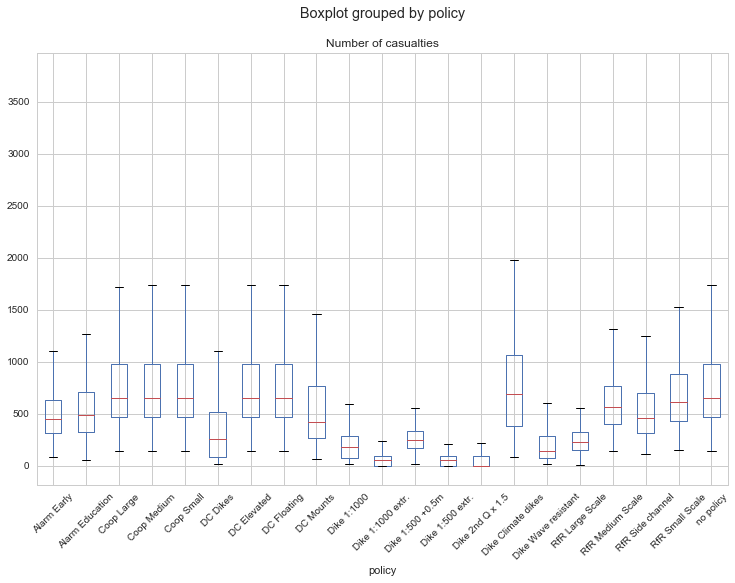

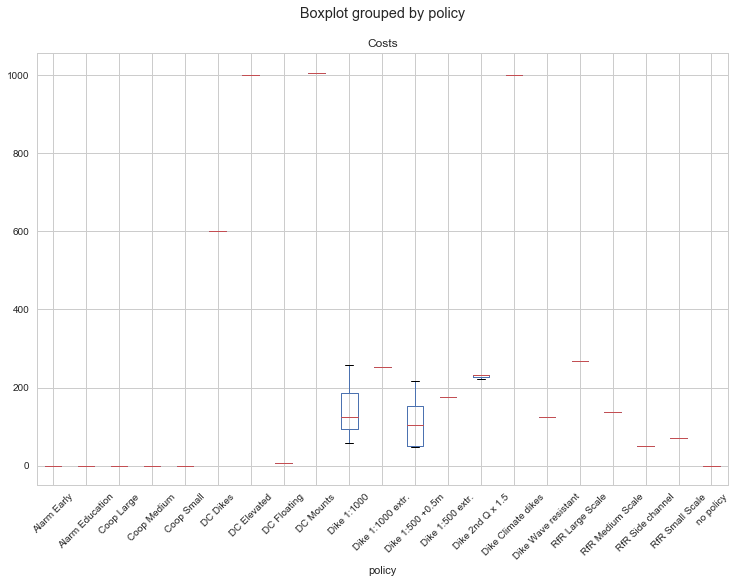

In [42]:
for entry in ["Flood damage (Milj. Euro)", "Number of casualties", "Costs"]:
    y.boxplot([entry], by="policy", rot=45)
plt.show()